In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df1=pd.read_csv('air_train.csv')
df2=pd.read_csv('air_test.csv')

In [2]:
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df1.drop('id',axis=1,inplace=True)

In [6]:
(df1.isnull().sum()/len(df1))*100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df1.select_dtypes('object').columns.tolist()

In [10]:
categorical_cols.remove("satisfaction")

In [11]:
df1[numeric_cols].corr()>0.8

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Flight Distance,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Inflight wifi service,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Departure/Arrival time convenient,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Ease of Online booking,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Gate location,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Food and drink,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Online boarding,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Seat comfort,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Inflight entertainment,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [12]:
df1.drop('Departure Delay in Minutes',axis=1, inplace=True)

In [13]:
numeric_cols.remove('Departure Delay in Minutes')

In [14]:
proper_num=['Flight Distance','Age','Arrival Delay in Minutes']

In [15]:
import matplotlib.pyplot as plt

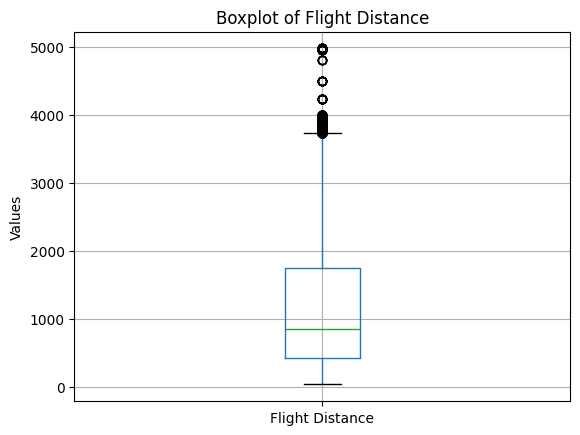

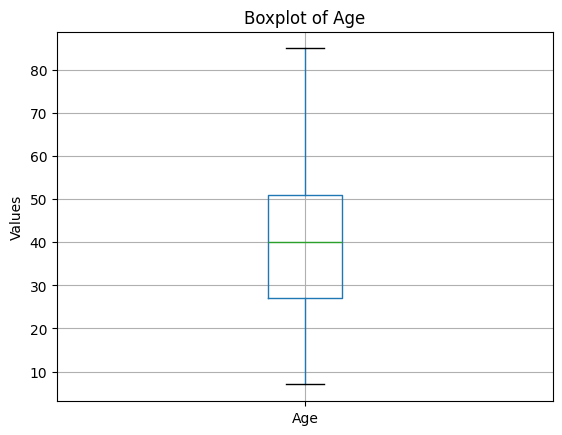

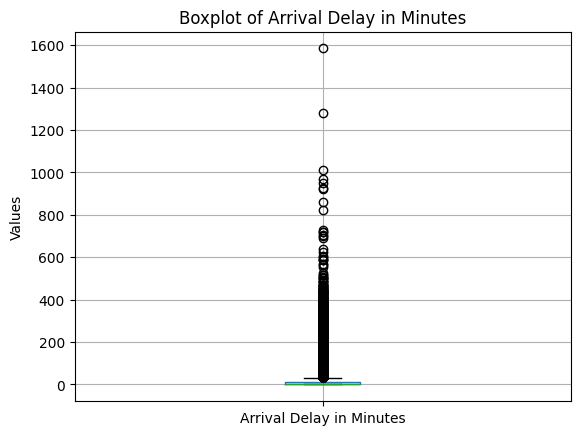

In [16]:
for column in proper_num:
    if df1[column].dtype in ['int64', 'float64']:
        df1[[column]].boxplot()
        plt.title(f'Boxplot of {column}')
        plt.ylabel('Values')
        plt.show()

In [17]:
def calculate_outliers_percentage(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    percentage = (len(outliers) / len(column)) * 100
    print(percentage)
for column in proper_num:
    print(column)
    outliers_percentage = calculate_outliers_percentage(df1[column])

Flight Distance
2.2076568141012025
Age
0.0
Arrival Delay in Minutes
13.469892078691817


In [18]:
def drop_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

df1 = df1.loc[drop_outliers(df1['Flight Distance']).index]

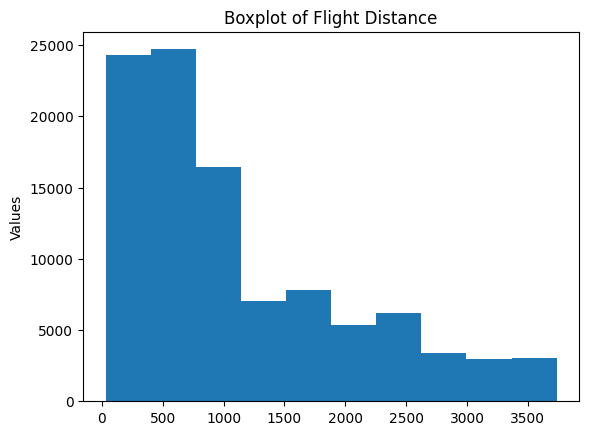

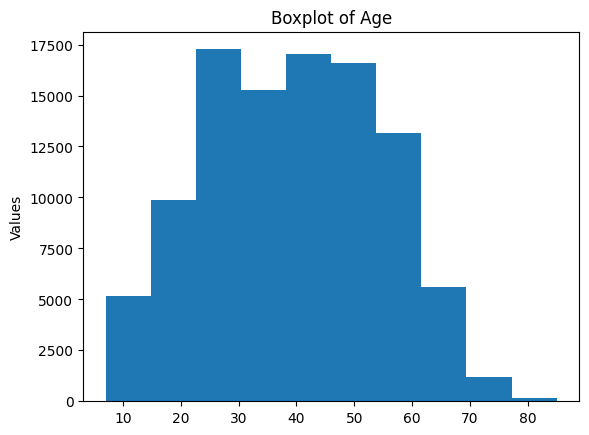

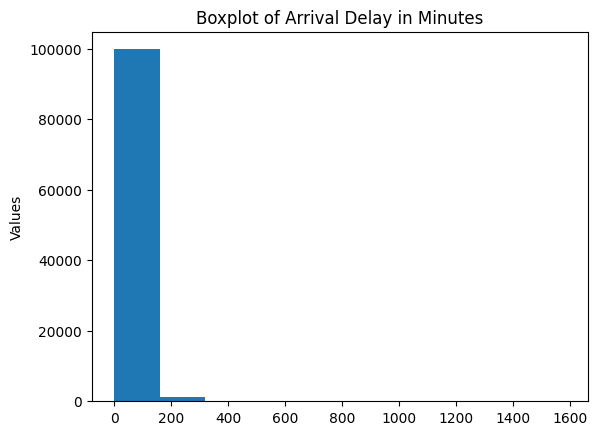

In [19]:
for column in proper_num:
    plt.hist(df1[column],label=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.show()

In [20]:
df1.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
count,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000,101307.000000
mean,39.289319,1128.428845,2.729505,3.062957,2.753749,2.976754,3.198259,3.236292,3.429457,3.348762,3.375601,3.342908,3.627953,3.300216,3.637310,3.280514,15.173413
std,15.160984,921.166887,1.325266,1.526193,1.396612,1.274941,1.330819,1.351335,1.321977,1.335501,1.289578,1.316755,1.181838,1.266602,1.176524,1.314097,38.669072
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,407.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,813.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,51.000000,1660.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000
max,85.000000,3736.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1584.000000


In [21]:
df1 = df1.drop(df1[df1['Arrival Delay in Minutes'] > 800].index)

In [22]:
df1= df1.drop(df1[df1['Arrival Delay in Minutes'] == 1584].index)

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
df1[categorical_cols]

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco
103900,Male,Loyal Customer,Business travel,Business
103901,Male,disloyal Customer,Business travel,Business
103902,Female,disloyal Customer,Business travel,Eco


In [28]:
df1['satisfaction'] = df1['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

In [29]:
df_original=df1.copy()

In [30]:
one_hot_encoded = pd.get_dummies(df1['Gender'], prefix='Gender')

df = pd.concat([df1, one_hot_encoded], axis=1)

df.drop('Gender', axis=1, inplace=True)

In [31]:
df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male
0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,...,4,3,4,4,5,5,18.0,0,False,True
1,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,...,1,5,3,1,4,1,6.0,0,False,True
2,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,...,4,3,4,4,4,5,0.0,1,True,False
3,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,...,2,5,3,1,4,2,9.0,0,True,False
4,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,...,3,4,4,3,3,3,0.0,1,False,True


In [32]:
categorical_cols.remove('Gender')

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])


In [34]:
df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male
0,0,13,1,2,460,3,4,3,1,5,...,4,3,4,4,5,5,18.0,0,False,True
1,1,25,0,0,235,3,2,3,3,1,...,1,5,3,1,4,1,6.0,0,False,True
2,0,26,0,0,1142,2,2,2,2,5,...,4,3,4,4,4,5,0.0,1,True,False
3,0,25,0,0,562,2,5,5,5,2,...,2,5,3,1,4,2,9.0,0,True,False
4,0,61,0,0,214,3,3,3,3,4,...,3,4,4,3,3,3,0.0,1,False,True


In [35]:
scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


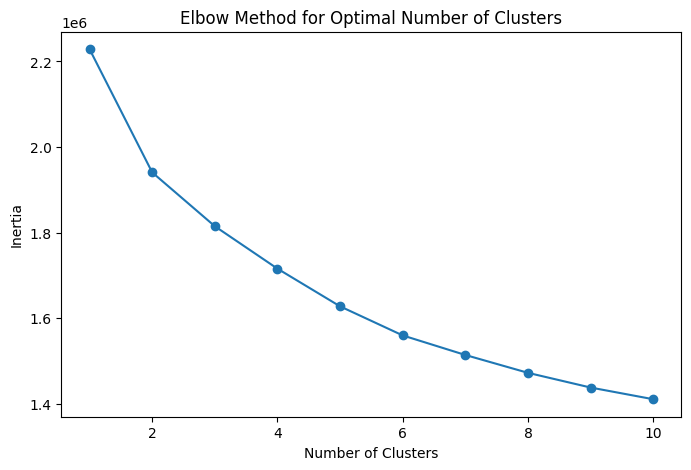

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df.drop(columns=['satisfaction']))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Elbow Method to determine the number of clusters to be formed:


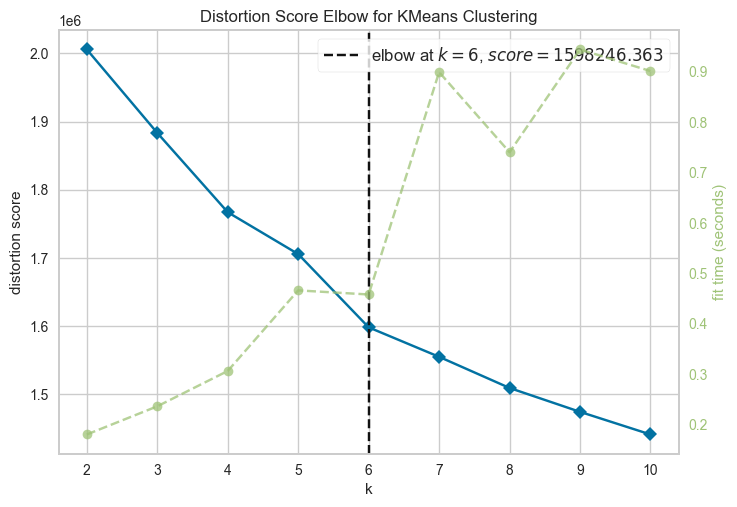

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

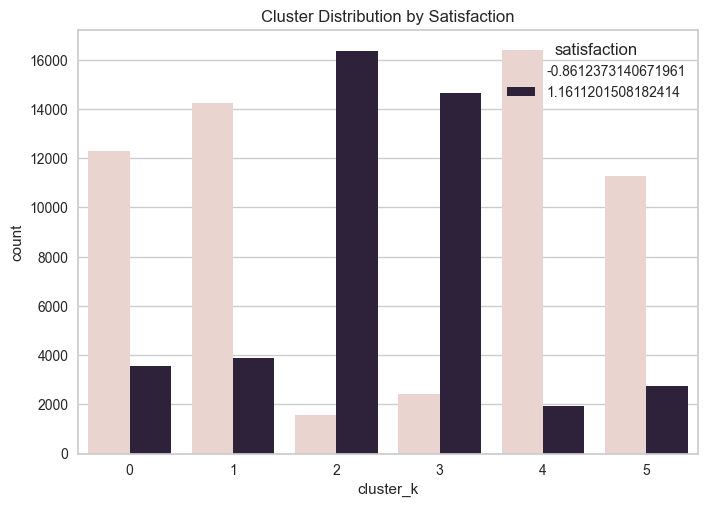

In [53]:

k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df1=df.copy()
df1['cluster_k'] = kmeans.fit_predict(df.drop(columns=['satisfaction']))

df1['satisfaction_binary'] = df1['satisfaction'].map(lambda x: 0 if x == 'neutral or dissatisfied' else 1)


sns.countplot(x='cluster_k', hue='satisfaction', data=df1)
plt.title('Cluster Distribution by Satisfaction')
plt.show()

In [54]:
df1.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,cluster_k,satisfaction_binary
0,-0.479192,-1.733969,1.468543,2.242822,-0.725581,0.204070,0.613958,0.176313,-1.550511,1.353859,...,0.314836,0.552519,1.158200,1.308531,0.077628,-0.861237,-1.015169,1.015169,1,1
1,2.086844,-0.942479,-0.680947,-0.976888,-0.969838,0.204070,-0.696492,0.176313,0.018196,-1.651802,...,-0.531301,-1.816063,0.308263,-1.735425,-0.242563,-0.861237,-1.015169,1.015169,5,1
2,-0.479192,-0.876521,-0.680947,-0.976888,0.014792,-0.550495,-0.696492,-0.539703,-0.766158,1.353859,...,0.314836,0.552519,0.308263,1.308531,-0.402659,1.161120,0.985057,-0.985057,2,1
3,-0.479192,-0.942479,-0.680947,-0.976888,-0.614851,-0.550495,1.269183,1.608344,1.586903,-0.900387,...,-0.531301,-1.816063,0.308263,-0.974436,-0.162516,-0.861237,0.985057,-0.985057,4,1
4,-0.479192,1.431991,-0.680947,-0.976888,-0.992636,0.204070,-0.041267,0.176313,0.018196,0.602444,...,0.314836,-0.237009,-0.541675,-0.213447,-0.402659,1.161120,-1.015169,1.015169,2,1


In [55]:
original_data_k = pd.DataFrame(scaler.inverse_transform(df), columns=df.columns)

In [56]:
original_data_k['cluster']=df1['cluster_k']

In [57]:
original_data_k.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,cluster
0,0.0,13.0,1.0,2.0,460.0,3.0,4.0,3.0,1.0,5.0,...,3.0,4.0,4.0,5.0,5.0,18.0,0.0,0.0,1.0,1
1,1.0,25.0,0.0,0.0,235.0,3.0,2.0,3.0,3.0,1.0,...,5.0,3.0,1.0,4.0,1.0,6.0,0.0,0.0,1.0,5
2,0.0,26.0,0.0,0.0,1142.0,2.0,2.0,2.0,2.0,5.0,...,3.0,4.0,4.0,4.0,5.0,0.0,1.0,1.0,0.0,2
3,0.0,25.0,0.0,0.0,562.0,2.0,5.0,5.0,5.0,2.0,...,5.0,3.0,1.0,4.0,2.0,9.0,0.0,1.0,0.0,4
4,0.0,61.0,0.0,0.0,214.0,3.0,3.0,3.0,3.0,4.0,...,4.0,4.0,3.0,3.0,3.0,0.0,1.0,0.0,1.0,2


In [58]:
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male
0,-0.479192,-1.733969,1.468543,2.242822,-0.725581,0.204070,0.613958,0.176313,-1.550511,1.353859,...,0.484210,-0.260366,0.314836,0.552519,1.158200,1.308531,0.077628,-0.861237,-1.015169,1.015169
1,2.086844,-0.942479,-0.680947,-0.976888,-0.969838,0.204070,-0.696492,0.176313,0.018196,-1.651802,...,-1.842086,1.258528,-0.531301,-1.816063,0.308263,-1.735425,-0.242563,-0.861237,-1.015169,1.015169
2,-0.479192,-0.876521,-0.680947,-0.976888,0.014792,-0.550495,-0.696492,-0.539703,-0.766158,1.353859,...,0.484210,-0.260366,0.314836,0.552519,0.308263,1.308531,-0.402659,1.161120,0.985057,-0.985057
3,-0.479192,-0.942479,-0.680947,-0.976888,-0.614851,-0.550495,1.269183,1.608344,1.586903,-0.900387,...,-1.066654,1.258528,-0.531301,-1.816063,0.308263,-0.974436,-0.162516,-0.861237,0.985057,-0.985057
4,-0.479192,1.431991,-0.680947,-0.976888,-0.992636,0.204070,-0.041267,0.176313,0.018196,0.602444,...,-0.291222,0.499081,0.314836,-0.237009,-0.541675,-0.213447,-0.402659,1.161120,-1.015169,1.015169


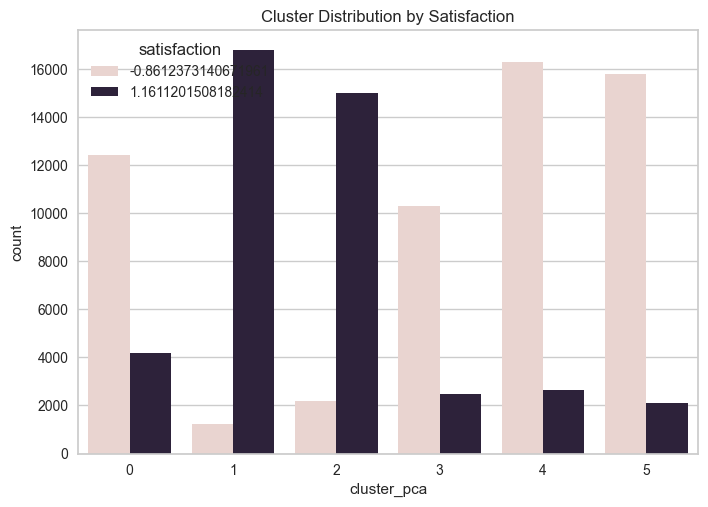

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df2=df.copy()
df_pca = pca.fit_transform(df.drop(columns=['satisfaction']))
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df2['cluster_pca'] = kmeans.fit_predict(df_pca)

df2['satisfaction_binary'] = df2['satisfaction'].map(lambda x: 0 if x == 'neutral or dissatisfied' else 1)


sns.countplot(x='cluster_pca', hue='satisfaction', data=df2)
plt.title('Cluster Distribution by Satisfaction')

plt.show()

Elbow Method to determine the number of clusters to be formed:


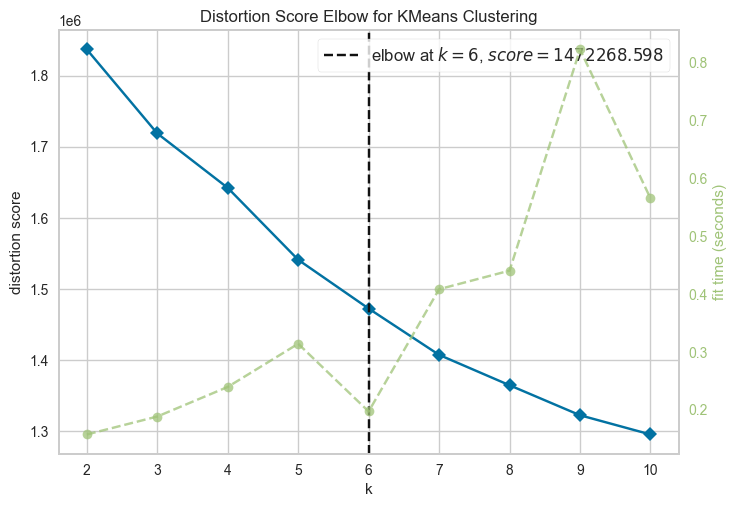

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

In [62]:
df_original['cluster_pca']=df2['cluster_pca']

In [63]:
df_original.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,cluster_pca
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,18.0,0,5.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,6.0,0,4.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,1,1.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,9.0,0,4.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,1,1.0


## Satisfied customers

In [64]:
df_final = df_original.loc[((df_original['cluster_pca'] == 1) | (df_original['cluster_pca'] == 2)) & (df_original['satisfaction'] == 1)]


In [65]:
df_final.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,cluster_pca
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,1,1.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,1,1.0
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,0.0,1,2.0
16,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,3,...,4,5,3,4,5,4,4,51.0,1,1.0
17,Male,Loyal Customer,41,Business travel,Business,2075,4,4,2,4,...,5,5,5,5,3,5,5,10.0,1,2.0


In [66]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14724 entries, 2 to 101295
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             14724 non-null  object 
 1   Customer Type                      14724 non-null  object 
 2   Age                                14724 non-null  int64  
 3   Type of Travel                     14724 non-null  object 
 4   Class                              14724 non-null  object 
 5   Flight Distance                    14724 non-null  int64  
 6   Inflight wifi service              14724 non-null  int64  
 7   Departure/Arrival time convenient  14724 non-null  int64  
 8   Ease of Online booking             14724 non-null  int64  
 9   Gate location                      14724 non-null  int64  
 10  Food and drink                     14724 non-null  int64  
 11  Online boarding                    14724 non-null  int64  

In [67]:
rating=['Inflight wifi service','Departure/Arrival time convenient','Inflight wifi service','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort']

In [71]:
df_final[rating].describe()

,Inflight wifi service,Departure/Arrival time convenient,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort
count,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000
mean,3.170198,2.954971,3.170198,3.036879,2.970456,3.498710,4.026759,3.955651
std,1.585942,1.562333,1.585942,1.574585,1.370955,1.246471,1.197913,1.146832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000
50%,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


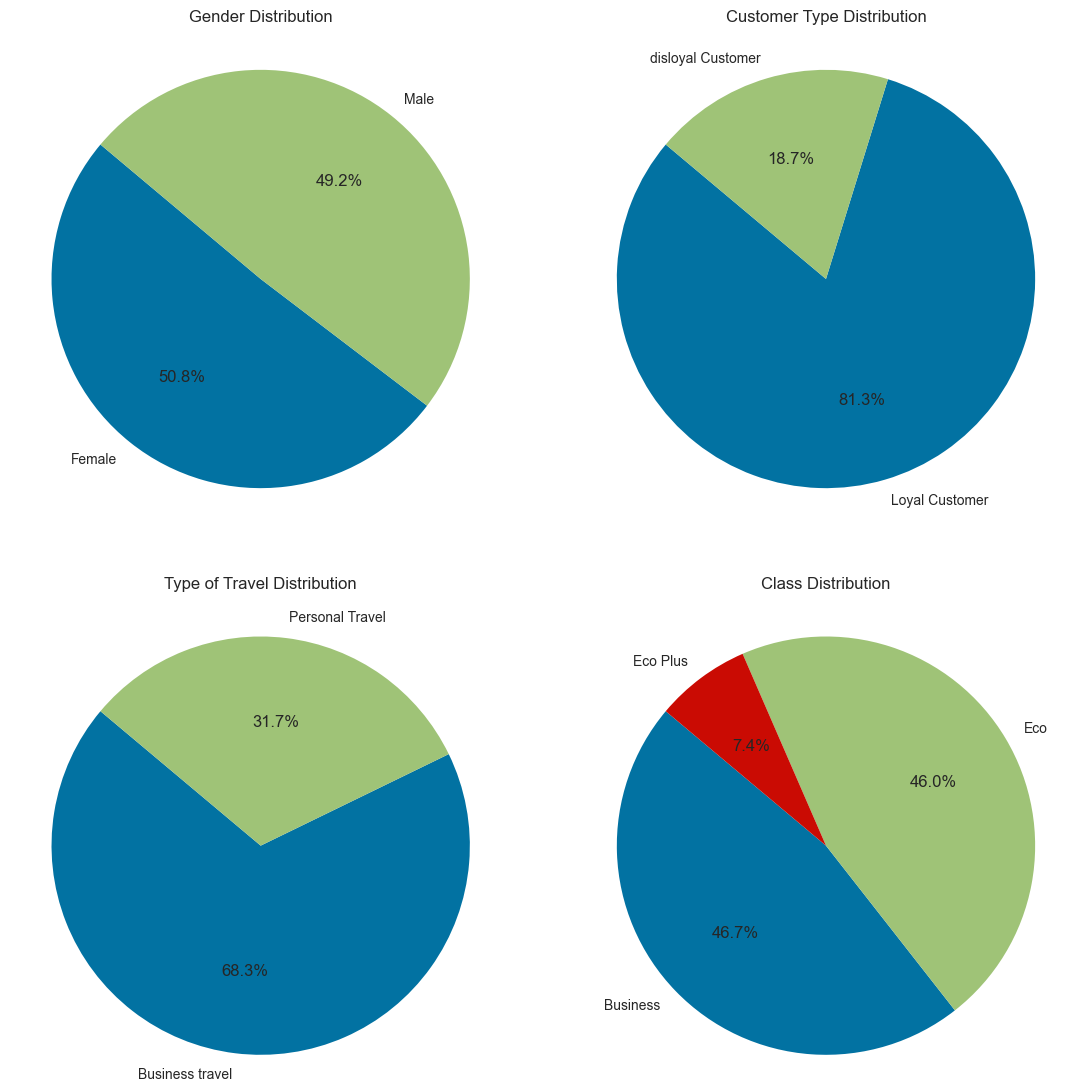

In [68]:
import matplotlib.pyplot as plt

gender_counts = df_original['Gender'].value_counts()
customer_type_counts = df_original['Customer Type'].value_counts()
type_of_travel_counts = df_original['Type of Travel'].value_counts()
class_counts = df_original['Class'].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Gender Distribution', pad=20)

axs[0, 1].pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Customer Type Distribution', pad=20)

axs[1, 0].pie(type_of_travel_counts, labels=type_of_travel_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Type of Travel Distribution', pad=20)

axs[1, 1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Class Distribution', pad=20)

for ax_row in axs:
    for ax in ax_row:
        ax.legend().set_visible(False)

plt.tight_layout(pad=4)

for ax_row in axs:
    for ax in ax_row:
        ax.axis('equal')

plt.show()


## Dissatisfied customers

In [69]:
df_final_unsat = df_original.loc[((df_original['cluster_pca'] == 4) | (df_original['cluster_pca'] == 5)) & (df_original['satisfaction'] == 0)]

In [72]:
df_final_unsat[rating].describe()

,Inflight wifi service,Departure/Arrival time convenient,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort
count,20654.000000,20654.000000,20654.000000,20654.000000,20654.000000,20654.000000,20654.000000,20654.000000
mean,2.396679,3.139586,2.396679,2.544447,2.979810,2.967125,2.660260,3.049288
std,0.966264,1.503375,0.966264,1.204197,1.198471,1.355630,1.149399,1.310318
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


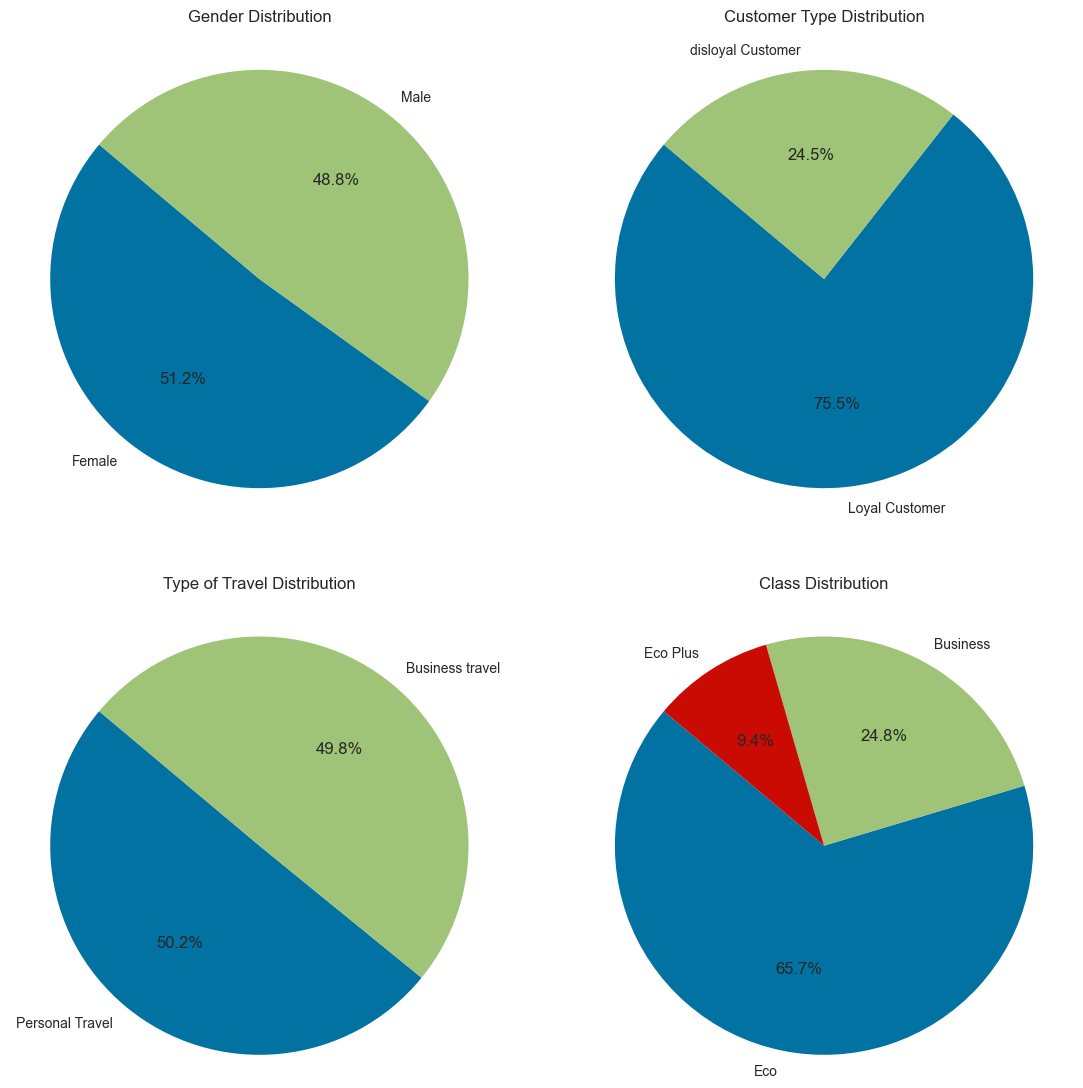

In [70]:
import matplotlib.pyplot as plt

gender_counts = df_final_unsat['Gender'].value_counts()
customer_type_counts = df_final_unsat['Customer Type'].value_counts()
type_of_travel_counts = df_final_unsat['Type of Travel'].value_counts()
class_counts = df_final_unsat['Class'].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Gender Distribution', pad=20)

axs[0, 1].pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Customer Type Distribution', pad=20)

axs[1, 0].pie(type_of_travel_counts, labels=type_of_travel_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Type of Travel Distribution', pad=20)

axs[1, 1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Class Distribution', pad=20)

for ax_row in axs:
    for ax in ax_row:
        ax.legend().set_visible(False)

plt.tight_layout(pad=4)

for ax_row in axs:
    for ax in ax_row:
        ax.axis('equal')

plt.show()


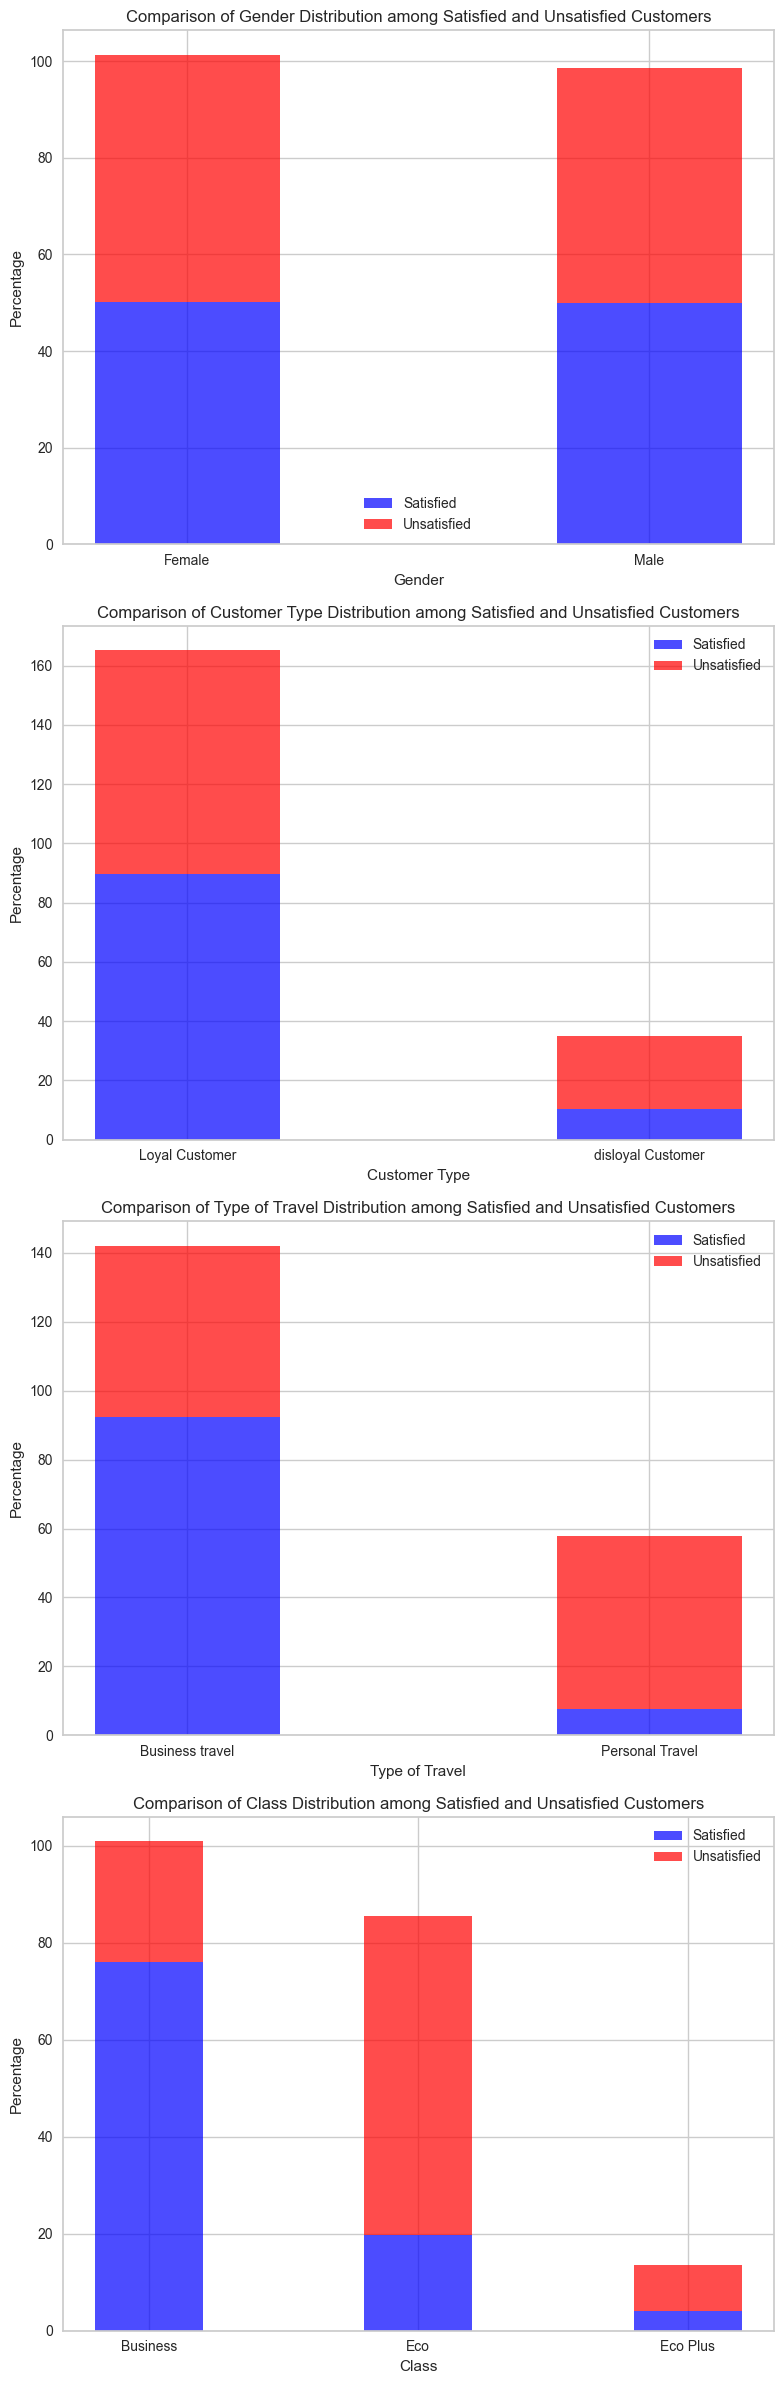

In [96]:
df_final_sat = df_final.copy()

def calculate_percentages(df, category):
    satisfied_counts = df_final_sat[category].value_counts(normalize=True) * 100
    unsatisfied_counts = df_final_unsat[category].value_counts(normalize=True) * 100
    
    # Combine into a single dataframe
    combined_df = pd.DataFrame({
        'Satisfied': satisfied_counts,
        'Unsatisfied': unsatisfied_counts
    }).fillna(0)  # Fill NaN values with 0 if a category is missing in one group
    
    return combined_df

# Calculate percentages for each category
categories = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
percentages = {category: calculate_percentages(df_final, category) for category in categories}

# Plotting
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(8, 6 * len(categories)))

for i, category in enumerate(categories):
    ax = axes[i]
    
    # Plotting bars for satisfied and unsatisfied customers
    width = 0.4
    indices = range(len(percentages[category].index))
    
    ax.bar(indices, percentages[category]['Satisfied'], width, label='Satisfied', color='blue', alpha=0.7)
    ax.bar(indices, percentages[category]['Unsatisfied'], width, bottom=percentages[category]['Satisfied'], label='Unsatisfied', color='red', alpha=0.7)

    # Adding labels, title, and legend
    ax.set_xlabel(category)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Comparison of {category} Distribution among Satisfied and Unsatisfied Customers')
    ax.set_xticks(indices)
    ax.set_xticklabels(percentages[category].index)
    ax.legend()

plt.tight_layout()
plt.show()

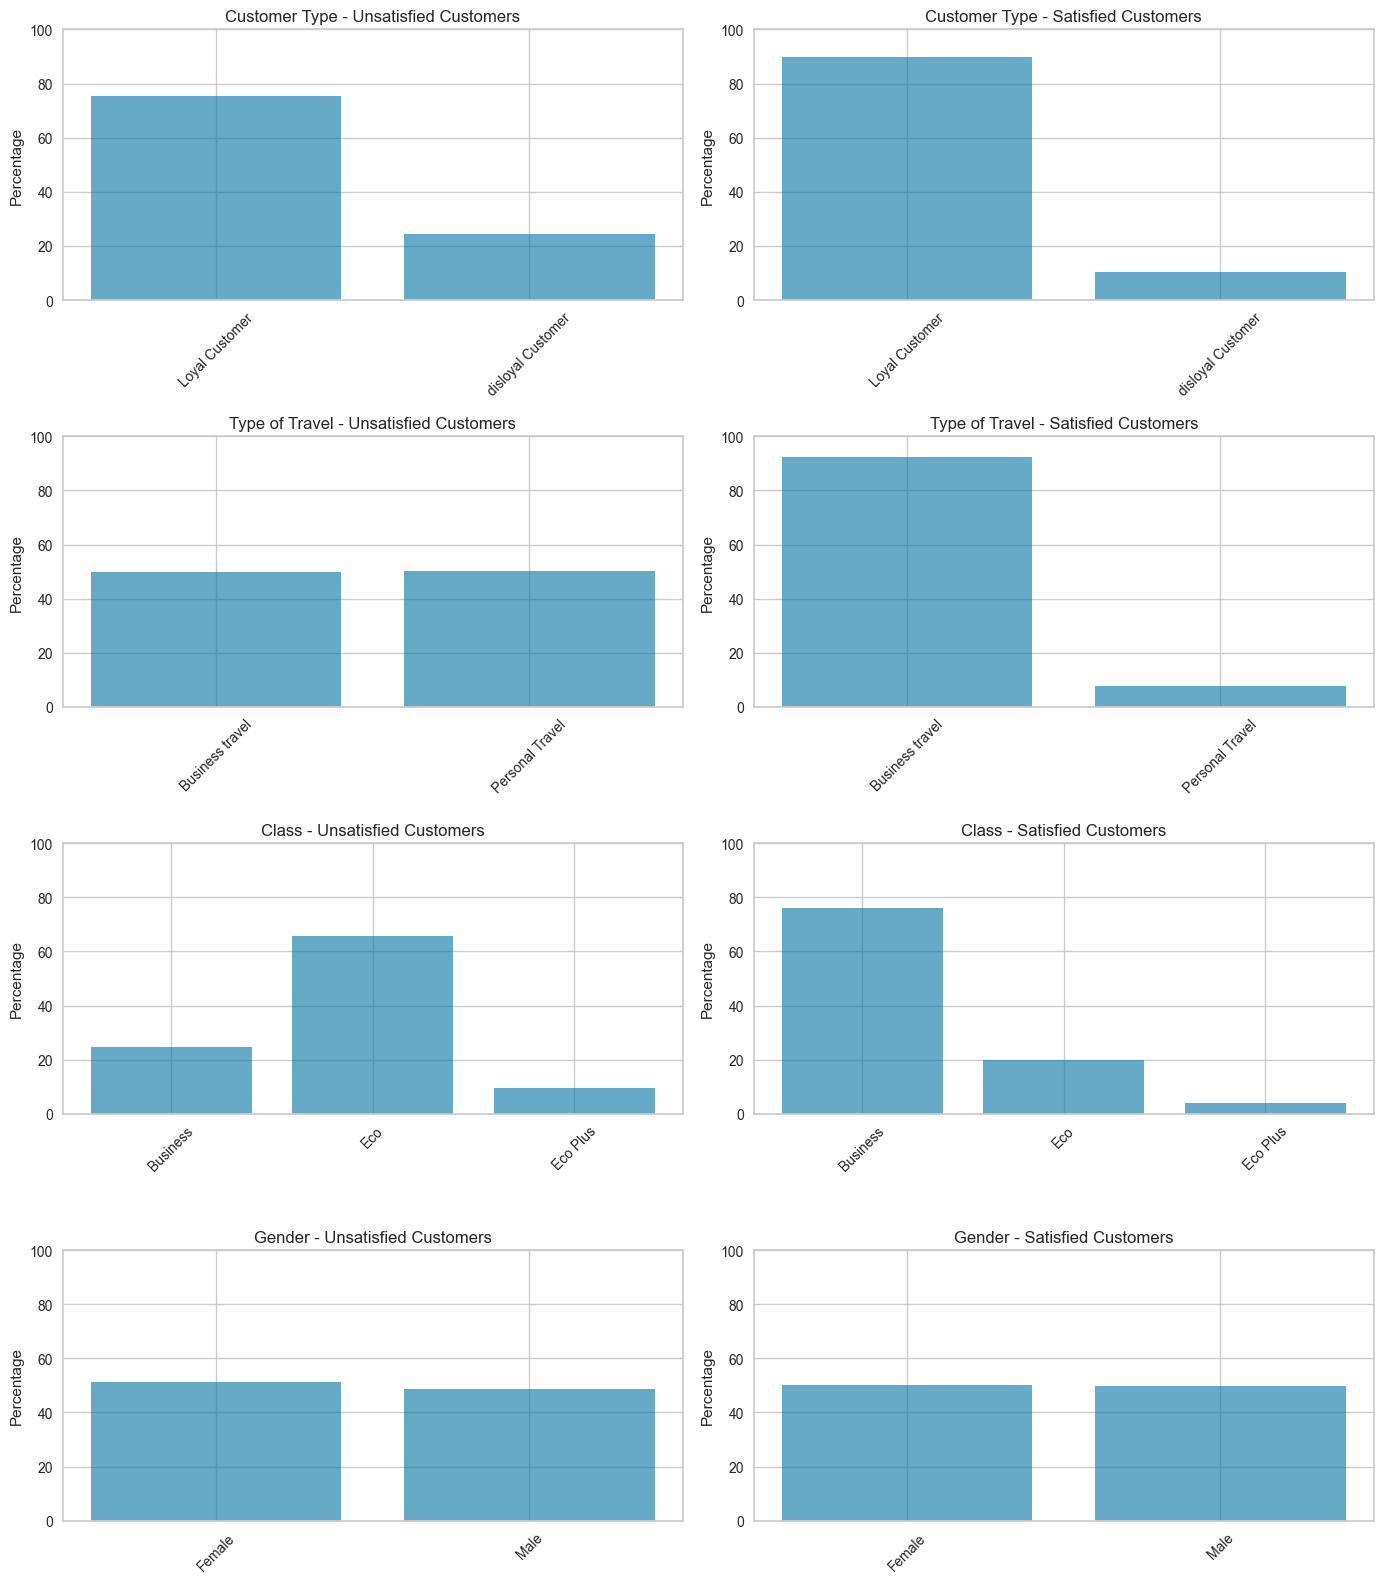

In [79]:

# Function to calculate percentages by category
def calculate_percentages(df):
    percentages = {}
    for column in ['Customer Type', 'Type of Travel', 'Class', 'Gender']:
        counts = df[column].value_counts(normalize=True)
        percentages[column] = counts * 100
    return percentages

# Calculate percentages for unsatisfied and satisfied customers
unsatisfied_percentages = calculate_percentages(df_final_unsat)
satisfied_percentages = calculate_percentages(df_final)

# Plotting
fig, axs = plt.subplots(4, 2, figsize=(14, 16))

categories = ['Customer Type', 'Type of Travel', 'Class', 'Gender']
for i, category in enumerate(categories):
    ax = axs[i]

    # Plotting unsatisfied customers
    unsatisfied_data = unsatisfied_percentages[category].sort_index()
    ax[0].bar(unsatisfied_data.index, unsatisfied_data.values, alpha=0.6, label='Unsatisfied')

    # Plotting satisfied customers
    satisfied_data = satisfied_percentages[category].sort_index()
    ax[1].bar(satisfied_data.index, satisfied_data.values, alpha=0.6, label='Satisfied')

    # Adding labels, title, and legend
    ax[0].set_ylabel('Percentage')
    ax[0].set_title(f'{category} - Unsatisfied Customers')
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].set_ylim(0, 100)

    ax[1].set_ylabel('Percentage')
    ax[1].set_title(f'{category} - Satisfied Customers')
    ax[1].tick_params(axis='x', rotation=45)
    ax[1].set_ylim(0, 100)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
